## Time Series Decompostion and Stationarity 

In this notebook I will look at the trend and seasonality for each pollutants, autcorrelation and also if the time series are stationary. This will be useful for feature engineering for forecasting.

In [29]:
#loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [30]:
#loading data
df = pd.read_csv('air_pollution.csv')

In [31]:
#date to datetime
df['date'] = pd.to_datetime(df['date'])

In [32]:
#function to ouput decomposed trends, seasonality, plot autocorrelation and use ADFueller Test for testing stationarity
def dcs(df,column_name):
    
    #dropping NaNs for PM25
    df = df.dropna()
    
    #plotting decompose of the series
    plt.figure(figsize = (20,20))
    result = seasonal_decompose(df[column_name],freq=1,model='additive')
    result.plot()
    plt.title('Decomposition')
    plt.show()
    
    #plotting Autocorrelation
    plot_acf(df[column_name],lags=52*2)
    plt.show()
    
    #computing Augmented Dickey Fueler Tests
    adf_results = adfuller(df[column_name])
    print('ADF Statistic: ',adf_results[0])
    print('p value: ',adf_results[1])
    
    #calculating if the time series are stationary
    values = []
    for key, value in adf_results[4].items():
        values.append(value)
    
    if (adf_results[0] < values[0]) and (adf_results[0] < values[1]) and (adf_results[0] < values[2]):
        print('The time-series is stationary!')
    else:
        print('The time-series is non stationary!')
        
    pass

<ipython-input-32-f15aa754e199>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df[column_name],freq=1,model='additive')


<Figure size 1440x1440 with 0 Axes>

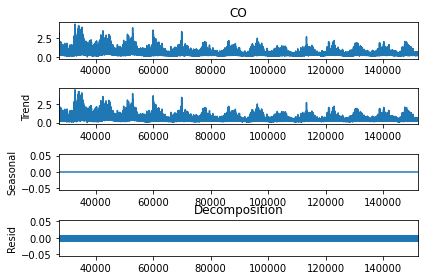

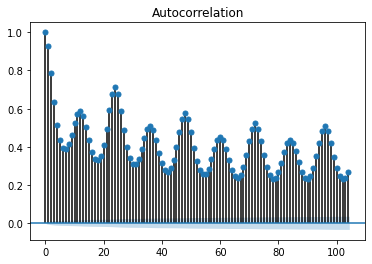

ADF Statistic:  -18.00225646638475
p value:  2.731799615975234e-30
The time-series is stationary!


In [33]:
dcs(df,df.columns[1])

<ipython-input-32-f15aa754e199>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df[column_name],freq=1,model='additive')


<Figure size 1440x1440 with 0 Axes>

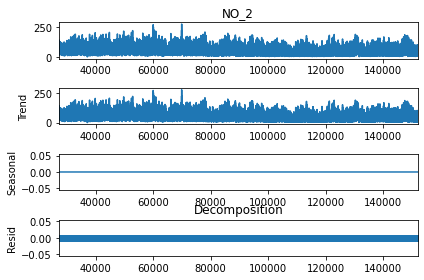

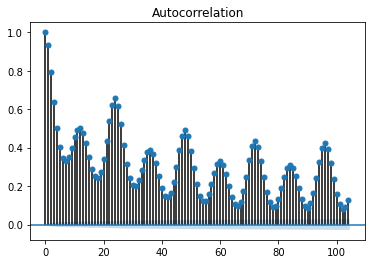

ADF Statistic:  -22.916175181652147
p value:  0.0
The time-series is stationary!


In [34]:
dcs(df,df.columns[2])

<ipython-input-32-f15aa754e199>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df[column_name],freq=1,model='additive')


<Figure size 1440x1440 with 0 Axes>

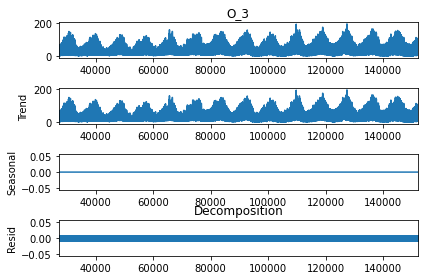

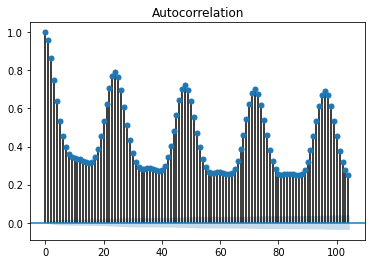

ADF Statistic:  -13.853555430437641
p value:  6.93387130130841e-26
The time-series is stationary!


In [35]:
dcs(df,df.columns[3])

<ipython-input-32-f15aa754e199>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df[column_name],freq=1,model='additive')


<Figure size 1440x1440 with 0 Axes>

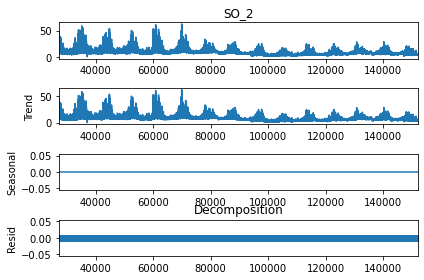

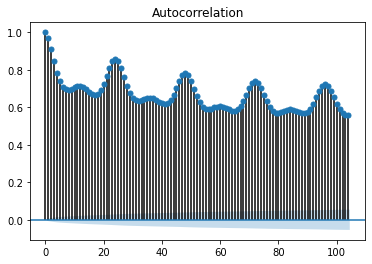

ADF Statistic:  -11.839712542340056
p value:  7.640746517148697e-22
The time-series is stationary!


In [36]:
dcs(df,df.columns[4])

<ipython-input-32-f15aa754e199>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df[column_name],freq=1,model='additive')


<Figure size 1440x1440 with 0 Axes>

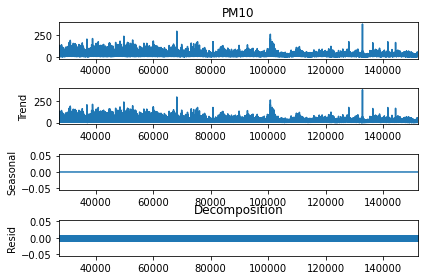

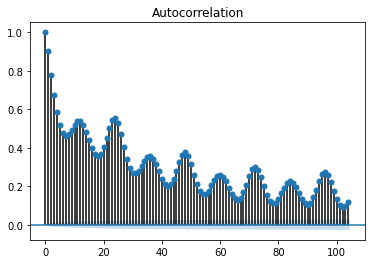

ADF Statistic:  -24.517882171811227
p value:  0.0
The time-series is stationary!


In [37]:
dcs(df,df.columns[5])

<ipython-input-32-f15aa754e199>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df[column_name],freq=1,model='additive')


<Figure size 1440x1440 with 0 Axes>

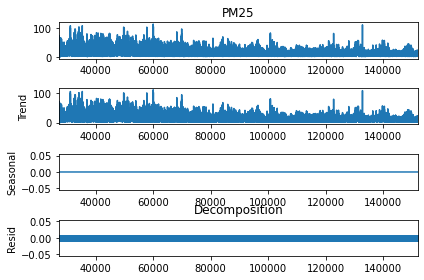

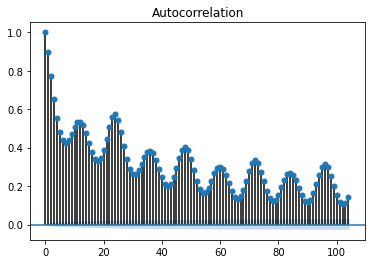

ADF Statistic:  -23.458801916152407
p value:  0.0
The time-series is stationary!


In [38]:
dcs(df,df.columns[6])

All the time series are stationary and have no major seasonality when modeled as an additive time series function.

What is noticable is high autocorrelation in lag for all pollutants except PM10 and PM2.5. This will be great to model features for machine learning techniques

Finally I will also remove NaNs from the whol dataframe where PM25 data is missing  for all forecasting tasks to keep things consistent and all time series of equal lengths.

In [45]:
#loading data
df = pd.read_csv('air_pollution.csv')

In [46]:
#dropping NaNs
df = df.dropna()

In [47]:
df.head()

,date,CO,NO_2,O_3,SO_2,PM10,PM25
162,2004-02-15,1.068245,79.180782,12.400776,20.510930,51.815004,27.801169
163,2004-02-22,0.682950,59.865487,21.756467,13.175073,28.555507,18.071946
164,2004-02-29,0.607953,55.101928,31.068003,11.547963,15.116386,11.207460
165,2004-03-07,0.746410,69.560323,29.894590,16.903427,35.353643,19.929011
166,2004-03-14,0.581821,56.741539,29.954483,12.119739,24.070017,14.874897


The data now starts from February 2004 which still leaves us with enough data for training models

In [48]:
df.to_csv('air_pollution.csv',index=False)